MAT555E - Spring 2022 

Cem Sanga - 509201104 -  sanga@itu.edu.tr

Homework 1

In [1]:
import numpy as np
import scipy.integrate as spint
import urllib
import json
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#--------NEEDED TO CALL BASEMAP--------
import os
os.environ['PROJ_LIB'] = '/Users/cemsanga/opt/anaconda3/envs/testbm/share/proj'
#--------------------------------------
from mpl_toolkits.basemap import Basemap

***

# Question 1

Write a python function that takes 4 arguments `a`, `b`, `N` and `fn` where 

* `a` and `b` determine an interval in $\mathbb{R}$ 
* `N` is a positive integer and 
* `fn` is a real valued function

The function you write should calculate the Riemann sum of the function `fn` over the interval [`a`,`b`] with `N` equal subintervals.

# Solution 1

Riemann sums are the discrete forms of the usual integrals. Instead of calculating integrand function along infinitesimaly close x points, we will approximate the intergal with areas of the rectangles. There are types of this implementation which depends on where the argument of the integrand function resides on the respective rectangle. I will use the midpoint convention here. My list of tasks will be;

- Defining a lambda function with variable x for whatever function we want to calculate.
- Using the given endpoints $a$ and $b$, I will get a range for the summation. With this range defined, I will divide it into $N$ sub-intervals to have N rectangles. I will use `np.linspace` for this and I will have $N$ amount of $x_n$ points 
- Area of the rectangles will be calculated. Since we are using midpoint rule, the vertical dimension will be $f(x_{n,mid})$ and the horizontal dimension will be $x_{n+1} - x_{n}$. $x_{n,mid}$ is going to be the average of the two consecutive x values such as $x_{n,mid} = \frac{x_{n+1} + x_{n}}{2}$
- Sum of the areas of rectangles should approximate to the actual integral calculation of the function as the interval $x_{n+1} - x_{n}$ gets smaller.

In [2]:
a = 0
b = 12
N = 1000
fn = lambda x : 2*x + 5

def Riemann_Sum(a,b,N,fn):
    d = (b-a)/N
    x = np.linspace(a,b,num=N,endpoint=True)
    incr = (x[1]-x[0])/2 # Any two index would do since the intervals are equal for any neighboring pair.
    xmid = x[:-1] + incr # Excluding last index of x with x[:-1] since there is no point beyond number b.
    rsum = []
    for n in range(xmid.size):
        area = fn(xmid[n])*incr*2 # incr*2 = (x[n+1]-x[n])
        rsum.append(area)
    return sum(rsum)

### Reality Check

Now I will use standard scipy library to calculate the same integral and compare the results.

In [3]:
RS = Riemann_Sum(a,b,N,fn)
integ = spint.quad(fn,a,b)[0]

print("Result with the Riemann sum is   = ", RS)
print("Result with built-in integration = ", integ)

Result with the Riemann sum is   =  204.00000000000003
Result with built-in integration =  204.0


***

# Question 2

We want to sample random samples from the unit circle $x^2+y^2=1$. Write a python function which takes one parameter $N$ the number of sample points and returns a sample $N$ points on the unit circle as a $N\times 2$ numpy matrix. Calculate some examples, and visualize them.

# Solution 2

I will be using polar coordinates to generate points on a circle. Since the radius will be fixed to 1 at all times, the position on the sphere has lost one degree of freedom and the angle $\theta$ measured from the positive x axis is enough to traverse every point on the circle. So, my tasks are;

- Defining the radius as a constant value.
- Get random samples with `random` library to account for $\theta$ values. The range of these values are $[0,2\pi]$.
- Use trigonometric identities to acquire positions with $\theta$ $\to$ $x=R\cos{\theta}$ and $y=R\sin{\theta}$. 
- Store the generated x and y values inside the columns of a "data" matrix.

In [4]:
def points_on_circle(N):
    R = 1
    data = np.empty(shape=(N,2))
    for n in range(N):
        seed = np.random.rand()
        θ = seed*2*np.pi
        x = R*np.cos(θ) # Angle in radians
        y = R*np.sin(θ)
        data[n,0] = x
        data[n,1] = y
    return data

In [5]:
def points_on_circle_var_R(N,R):
    data = np.empty(shape=(N,2))
    for n in range(N):
        seed = np.random.rand()
        θ = seed*2*np.pi
        x = R*np.cos(θ) # Angle in radians
        y = R*np.sin(θ)
        data[n,0] = x
        data[n,1] = y
    return data

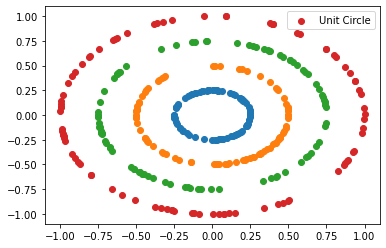

In [6]:
N=89

veri = points_on_circle_var_R(N,0.25)
verix1 = veri[:,0]
veriy1 = veri[:,1]

veri = points_on_circle_var_R(N,0.5)
verix2 = veri[:,0]
veriy2 = veri[:,1]

veri = points_on_circle_var_R(N,0.75)
verix3 = veri[:,0]
veriy3 = veri[:,1]

veri = points_on_circle(N)
verix4 = veri[:,0]
veriy4 = veri[:,1]

plt.scatter(verix1,veriy1)
plt.scatter(verix2,veriy2)
plt.scatter(verix3,veriy3)
plt.scatter(verix4,veriy4,label="Unit Circle")
plt.legend()

***
# Question 3

Generalize the function above to sampling over the unit sphere $x^2+y^2+z^2=1$. The function should return a $N\times 3$ numpy array.  Calculate some examples, and visualize them. [Hint: Use spherical coordinates.]

# Solution 3

This part needs modifications to the the previous circle code, which are;

- There are two degrees of freedom now. We need to generate another angle $\phi$. $\phi$ will be measured in the xy-plane. The range of $\phi$ is $[0,2\pi]$ but now, the range of $\theta$ is reduced to $[0,\pi]$.
- The trigonometric identities are changed to $\to$ $x=R\sin{\theta}\cos{\phi}$, $y=R\sin{\theta}\sin{\phi}$ and $z=R\cos{\theta}$.
- Final "data" matrix has three columns now, extra one is to hold z-coordinate values.

In [7]:
def points_on_sphere(N):
    R = 1
    data = np.empty(shape=(N,3))
    for n in range(N):
        seed1 = np.random.rand()
        seed2 = np.random.rand()
        θ = seed1*np.pi
        ϕ = seed2*2*np.pi
        x = R*np.sin(θ)*np.cos(ϕ) # Angle in radians
        y = R*np.sin(θ)*np.sin(ϕ)
        z = R*np.cos(θ)
        data[n,0] = x
        data[n,1] = y
        data[n,2] = z
    return data

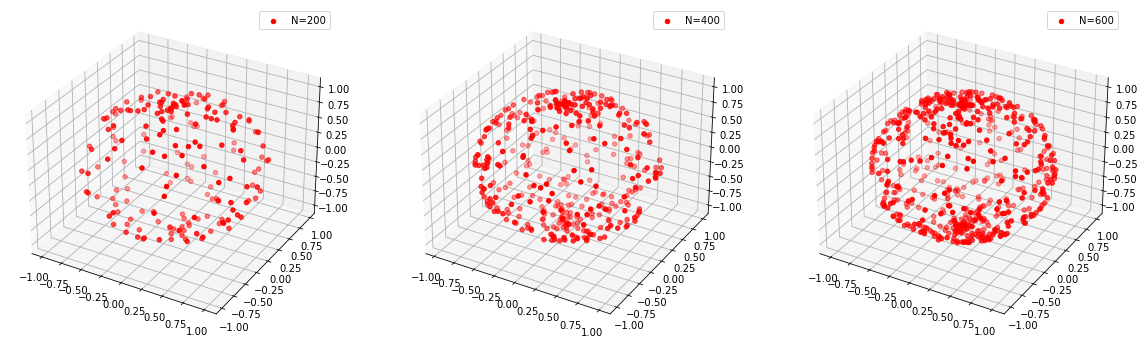

In [8]:
N=200
veri3d1 = points_on_sphere(N)
veri3d2 = points_on_sphere(2*N)
veri3d3 = points_on_sphere(3*N)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter3D(veri3d1[:,0],veri3d1[:,1],veri3d1[:,2], color = "red",label= "N={adet}".format(adet=N))
plt.legend()

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter3D(veri3d2[:,0],veri3d2[:,1],veri3d2[:,2], color = "red",label= "N={adet}".format(adet=2*N))
plt.legend()

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter3D(veri3d3[:,0],veri3d3[:,1],veri3d3[:,2], color = "red",label= "N={adet}".format(adet=3*N))
plt.legend()

***
# Question 4

How can we generalize this to sampling over an $n$-dimensional sphere $x_1^2+\cdots+x_n^2=1$? Write a python function and explain your code.

***
# Question 5

Istanbul Municipality has a [data service](https://data.ibb.gov.tr/) that is accessible via an API. Your task is to visualize the stops. Use the [Basemap](https://matplotlib.org/basemap/) library to draw the map.  Their locations (longitudes and latitudes) are given at this [link](https://data.ibb.gov.tr/dataset/public-transport-gtfs-data/resource/d1f7c258-bbc1-406f-9ab2-7a7c1797c673). Here is a list of things I'd like:

1. You should pull the data via the API. I don't want to see the file locally.
2. In the visualization, the size of the dot representing each stop should depend on the number of people using it.

For the second part, browse through the data server and find the relevant data source.

In [42]:
url = "https://data.ibb.gov.tr/datastore/odata3.0/d1f7c258-bbc1-406f-9ab2-7a7c1797c673?$top=6440&$format=json"
fileobj = urllib.request.urlopen(url)
fileobj = json.loads(fileobj.read())
veri = fileobj.get("value")
durak = pd.DataFrame(veri)
durak['stop_lat'] = pd.to_numeric(durak['stop_lat'])
durak['stop_lon'] = pd.to_numeric(durak['stop_lon'])
durak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6440 entries, 0 to 6439
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _id                  6440 non-null   int64  
 1   stop_id              6440 non-null   object 
 2   stop_code            6440 non-null   object 
 3   stop_name            6440 non-null   object 
 4   stop_desc            65 non-null     object 
 5   stop_lat             6440 non-null   float64
 6   stop_lon             6440 non-null   float64
 7   zone_id              0 non-null      object 
 8   stop_url             0 non-null      object 
 9   location_type        6440 non-null   object 
 10  parent_station       0 non-null      object 
 11  stop_timezone        0 non-null      object 
 12  wheelchair_boarding  6440 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 654.2+ KB


I will zoom into European coast and I also keep zooming into Sarıyer region since I live there. 

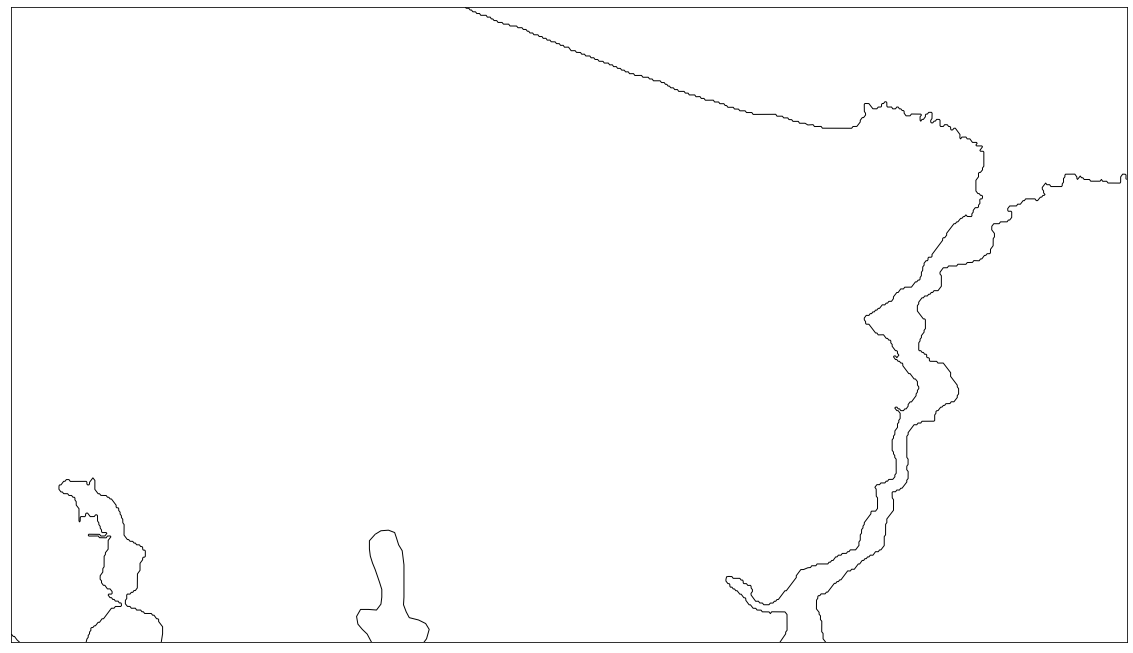

In [32]:
m = Basemap(projection='merc',
           llcrnrlat=41.0,
           urcrnrlat=41.3,
           llcrnrlon=28.5,
           urcrnrlon=29.2,
           resolution='f')

fig = plt.figure(figsize=(20,12))

m.drawcoastlines()
m.drawcountries(color='gray')
m.drawrivers()
plt.show()

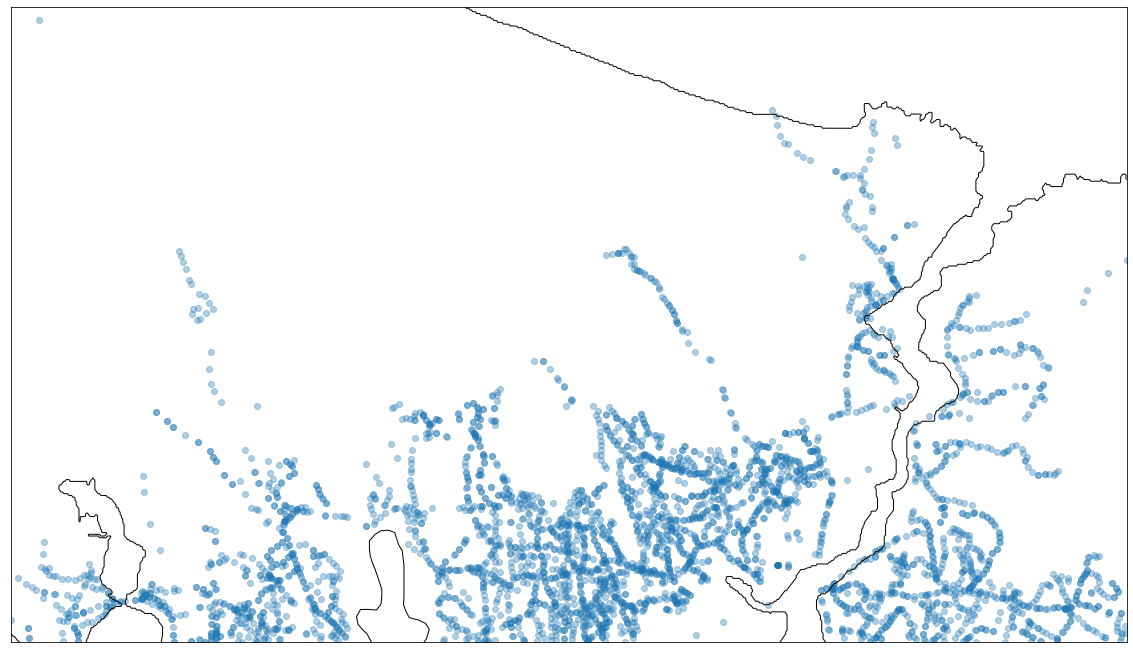

In [83]:
durak = durak[(durak["stop_lat"]>41.0)] #and (durak["stop_lat"]<41.3)]
durak = durak[ (durak["stop_lon"]>28.5)] #and (durak["stop_lon"]<29.2)]

durak = durak[(durak["stop_lat"]<41.3)]
durak = durak[(durak["stop_lon"]<29.2)]

xdurak,ydurak = m(durak['stop_lon'],durak["stop_lat"])


fig = plt.figure(figsize=(20,12))

m.drawcoastlines()
m.drawcountries(color='gray')
m.drawrivers()
m.scatter(xdurak, ydurak, cmap='jet',alpha = 0.35)
plt.show()

# Sources

- [Mathematical Python - Riemann Sums](https://personal.math.ubc.ca/~pwalls/math-python/integration/riemann-sums/)
- [N-spheres sampling](http://extremelearning.com.au/how-to-generate-uniformly-random-points-on-n-spheres-and-n-balls/)
- [Fixing `KeyError: 'PROJ_LIB'` at proj/basemap](https://moonbooks.org/Articles/How-to-fix-KeyError-PROJLIB-while-using-basemap-in-python-/)